Predicting recidivism with the COMPASS dataset Downloading the dataset from Kaggle. In order to increase the fairness and accuracy of the algorithm in determining recidivism without racism, we are utilizing SVM, Decission Tree, and Ensamble learning in this notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

/tmp/ipykernel_44858/2140056488.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv("/home/z/Music/devnew_xaiservice/XAIport/modelserver/compasdata/propublicaCompassRecividism_data_fairml.csv/propublica_data_for_fairml.csv")
df=pd.read_csv("/home/z/Music/devnew_xaiservice/XAIport/modelserver/compasdata/compas-scores-raw.csv")
data

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6167,0,0,1,0,1,1,0,0,0,0,0,0
6168,0,0,0,0,1,1,0,0,0,0,0,0
6169,0,0,0,1,0,0,0,0,0,1,0,0
6170,0,3,0,0,0,1,0,0,0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Two_yr_Recidivism     6172 non-null   int64
 1   Number_of_Priors      6172 non-null   int64
 2   score_factor          6172 non-null   int64
 3   Age_Above_FourtyFive  6172 non-null   int64
 4   Age_Below_TwentyFive  6172 non-null   int64
 5   African_American      6172 non-null   int64
 6   Asian                 6172 non-null   int64
 7   Hispanic              6172 non-null   int64
 8   Native_American       6172 non-null   int64
 9   Other                 6172 non-null   int64
 10  Female                6172 non-null   int64
 11  Misdemeanor           6172 non-null   int64
dtypes: int64(12)
memory usage: 578.8 KB


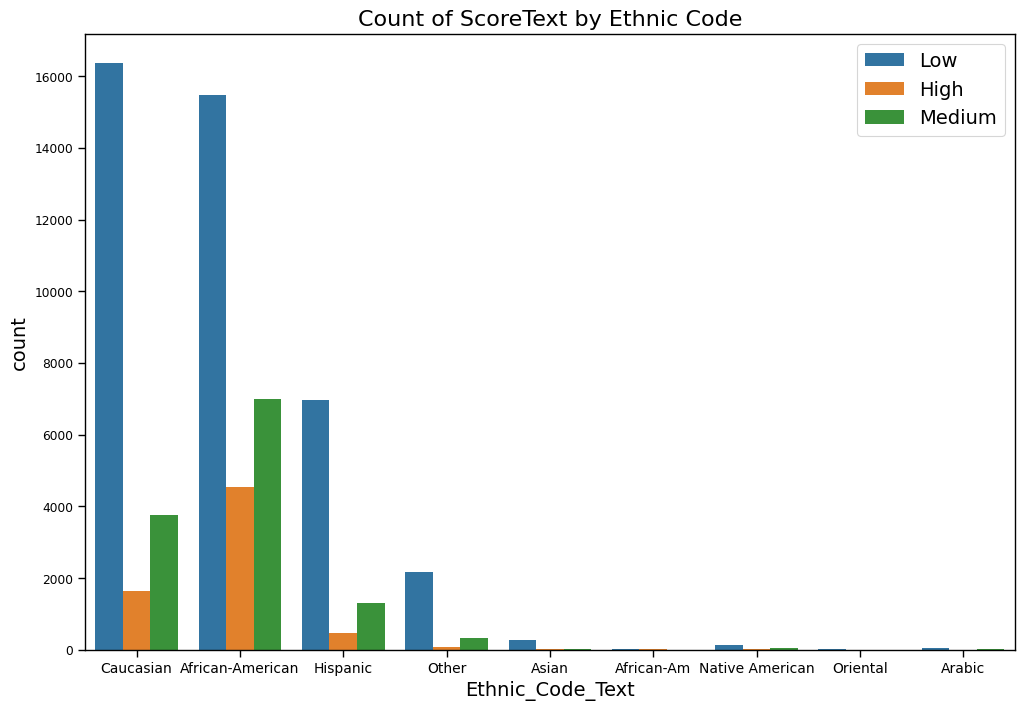

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper", rc={"font.size": 14, "axes.titlesize": 16, "axes.labelsize": 14})

# Assuming you have a DataFrame df with 'Ethnic_Code_Text' and 'ScoreText' columns
plt.figure(figsize=(12, 8))

plt.xticks(fontsize=10)
sns.countplot(x='Ethnic_Code_Text', hue='ScoreText', data=df)
plt.title('Count of ScoreText by Ethnic Code')

# Adjust legend fontsize if needed
plt.legend(fontsize='medium')

# Show the plot
plt.show()

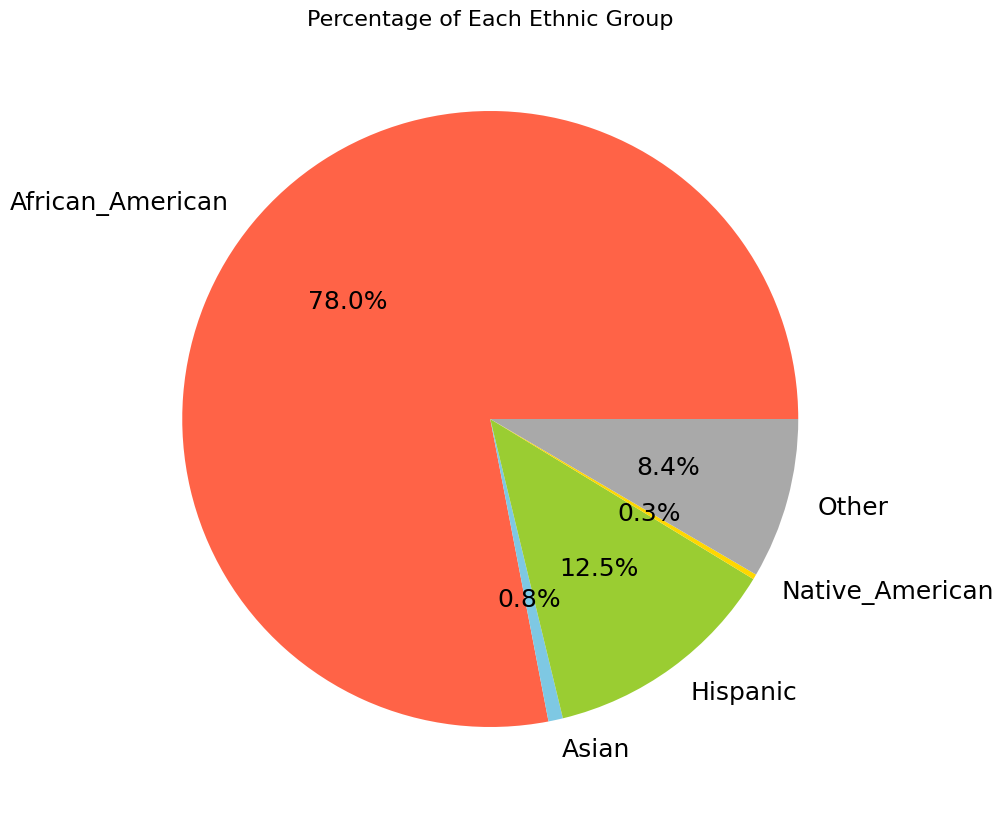

In [5]:
ethnic_columns = ['African_American', 'Asian', 'Hispanic', 'Native_American', 'Other']

# Calculate the percentage of each ethnic group
percentages = (data[ethnic_columns].sum() / len(data)) * 100
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], format='%m/%d/%y')

# Create a new column for the year of birth
df['YearOfBirth'] = df['DateOfBirth'].dt.year


colors = ['#FF6347', '#7EC8E3', '#9ACD32', '#FFD700', '#A9A9A9']

# Set a larger font size
plt.rcParams['font.size'] = 18

# Plot the pie chart with custom colors
plt.figure(figsize=(10, 10))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 18})
plt.title('Percentage of Each Ethnic Group')

plt.show()

/tmp/ipykernel_44858/2449903212.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_df = df.groupby(['Sex_Code_Text', 'AgeGroup']).size().unstack()


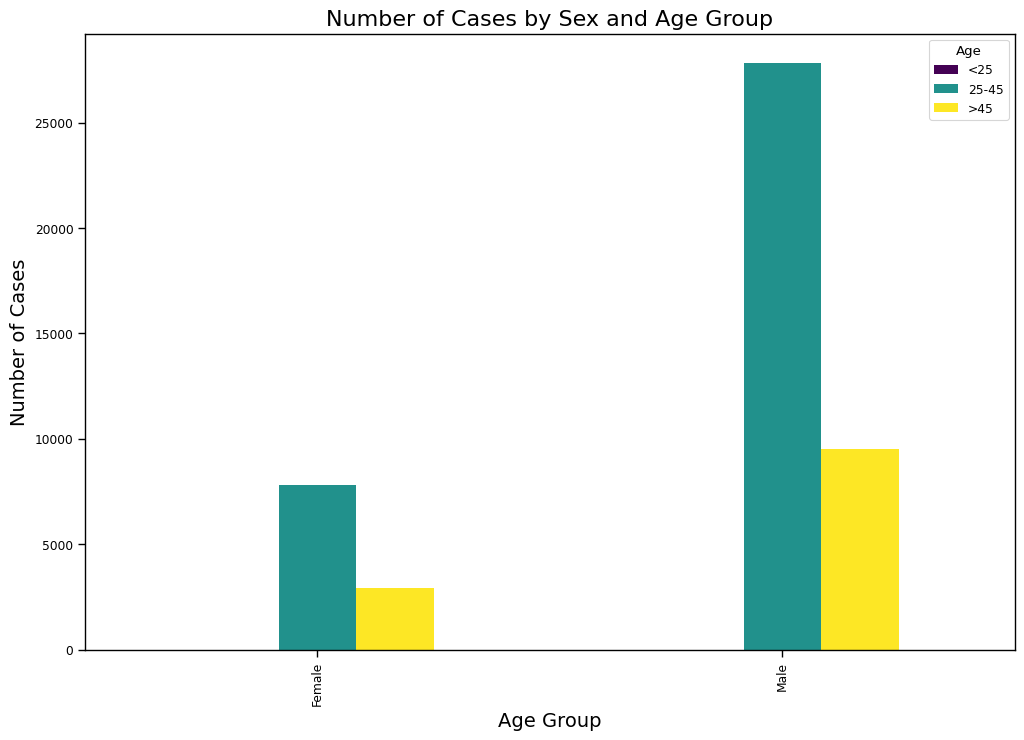

In [6]:
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], format='%m/%d/%y')

# Calculate age based on current date
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['DateOfBirth'].dt.year

# Define age groups
bins = [0, 25, 45, float('inf')]
labels = ['<25', '25-45', '>45']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a pivot table to count the number of cases for each combination of Sex and AgeGroup
pivot_df = df.groupby(['Sex_Code_Text', 'AgeGroup']).size().unstack()

# Plot the bar graph
pivot_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.title('Number of Cases by Sex and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Age')
plt.show()

In [7]:
data.isnull().sum()

Two_yr_Recidivism       0
Number_of_Priors        0
score_factor            0
Age_Above_FourtyFive    0
Age_Below_TwentyFive    0
African_American        0
Asian                   0
Hispanic                0
Native_American         0
Other                   0
Female                  0
Misdemeanor             0
dtype: int64

Dividing Data into depenedent and independent datasets

In [8]:

x=data.drop("Two_yr_Recidivism",axis=1)

y=data["Two_yr_Recidivism"]


Spliting Data into testing and training

In [9]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

SVM

In [10]:

from sklearn.svm import SVC

# Set up SVM model with a given kernel and c parameter
svm = SVC(C=1.0, kernel='rbf',probability=True)

# Train the model on the iris data
svm.fit(x_train, y_train)
svm_pred=svm.predict(x_test)
acc=accuracy_score(y_test, svm_pred)
print("Accuracy score: ",acc)
cre=classification_report(y_test, svm_pred)
print(cre)

Accuracy score:  0.6785425101214575
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       673
           1       0.70      0.52      0.59       562

    accuracy                           0.68      1235
   macro avg       0.68      0.67      0.66      1235
weighted avg       0.68      0.68      0.67      1235



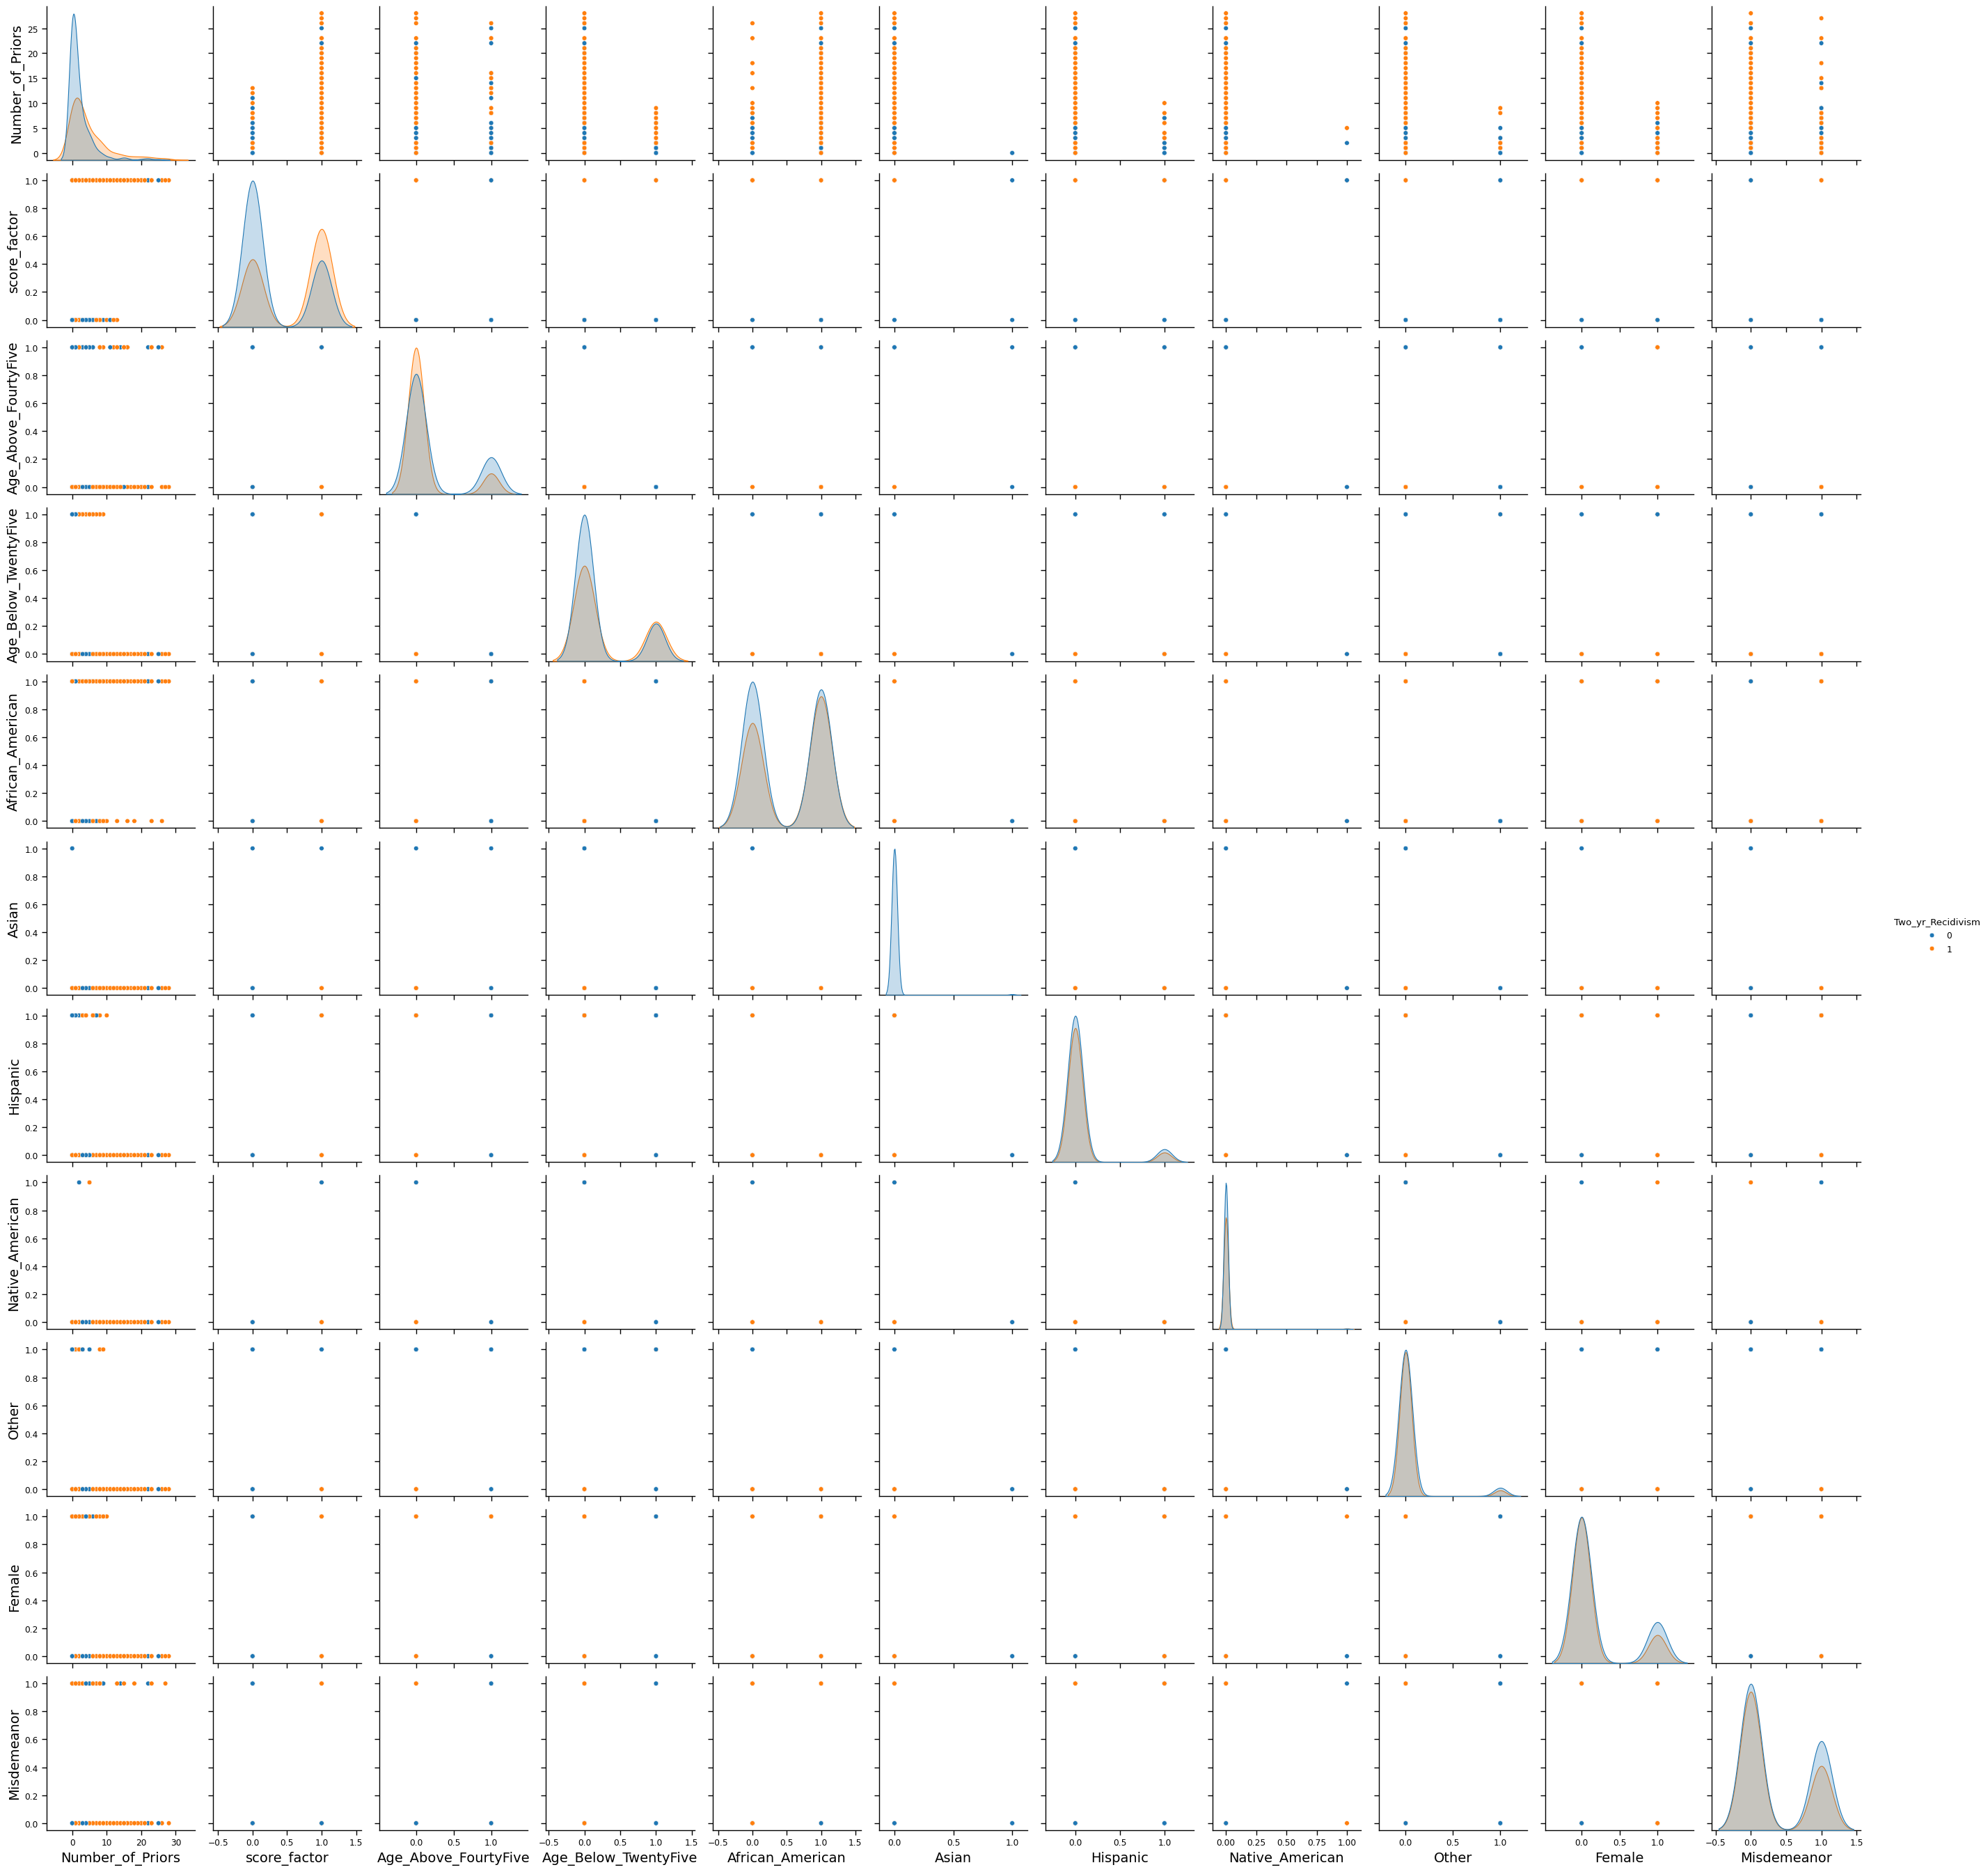

In [11]:
import seaborn as sns
dfff = pd.DataFrame(data)
# Subsample the data (adjust the fraction as needed)
df_sampled = dfff.sample(frac=0.1, random_state=42)

# Visualize pair-wise feature scatter plots
sns.pairplot(df_sampled, hue="Two_yr_Recidivism", diag_kind="kde")
plt.show()



Decission Tree

In [12]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, svm_pred)  

In [13]:
y

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

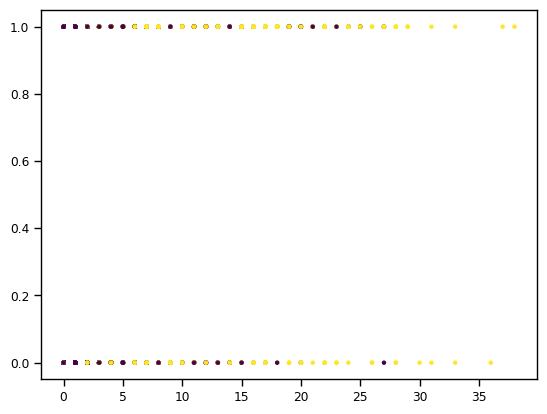

In [14]:
plt.scatter(x['Number_of_Priors'],x['African_American'], c=y, marker = '.')

plt.show() 

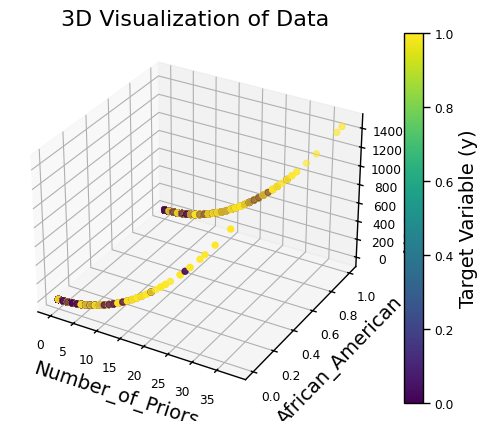

In [15]:

from mpl_toolkits.mplot3d import Axes3D

# Assuming 'x' is your DataFrame, 'Number_of_Priors' and 'African_American' are columns, and 'y' is the target variable
X1 = x['Number_of_Priors'].values.reshape((-1, 1))
X2 = x['African_American'].values.reshape((-1, 1))
X3 = (X1**2 + X2**2)
X = np.hstack((X1, X2, X3))

# Visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
scatter = axes.scatter(X1, X2, X1**2 + X2**2, c=y, depthshade=True)

# Add labels
axes.set_xlabel('Number_of_Priors')
axes.set_ylabel('African_American')
axes.set_zlabel('X1^2 + X2^2')
axes.set_title('3D Visualization of Data')

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Target Variable (y)')

plt.show()


In [16]:
new_x_train=x_train['Number_of_Priors']

new_x_train=pd.concat([new_x_train, x_train['African_American']], axis=1)

new_x_train

,Number_of_Priors,African_American
3384,13,1
4719,18,1
4026,0,0
1552,0,0
5795,0,1
...,...,...
511,1,1
2591,1,0
4902,12,0
593,10,1


In [17]:


classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(new_x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [18]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, svm_pred)  

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

dt_pred=dtc.predict(x_test)
acc=accuracy_score(y_test, dt_pred)
print("Accuracy score: ",acc)
cre=classification_report(y_test, dt_pred)
print(cre)

Accuracy score:  0.665587044534413
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       673
           1       0.67      0.52      0.59       562

    accuracy                           0.67      1235
   macro avg       0.67      0.65      0.65      1235
weighted avg       0.67      0.67      0.66      1235



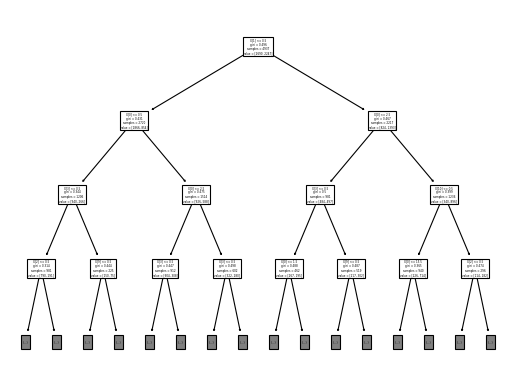

In [20]:
from sklearn import tree

tree.plot_tree(dtc, max_depth=3);

In [23]:
from sklearn.tree import  export_graphviz
from sklearn.tree import export_text
import graphviz

clf = DecisionTreeClassifier(max_depth=1)
clf.fit(x_train, y_train)

# Export the tree to Graphviz format
dot_data = export_graphviz(
    clf, 
    out_file=None, 
    feature_names=x.columns, 
    class_names=["No Recidivism", "Recidivism"], 
    filled=True, 
    rounded=True
)

# Create a Graphviz object and display only the root
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree_root", format="png", cleanup=True)
# graph.view("decision_tree_root")

In [24]:
# from IPython.display import Image, display

# # Display the decision tree image in the notebook
# display(Image(filename="decision_tree_root.png"))


FileNotFoundError: [Errno 2] No such file or directory: 'decision_tree_root.png'

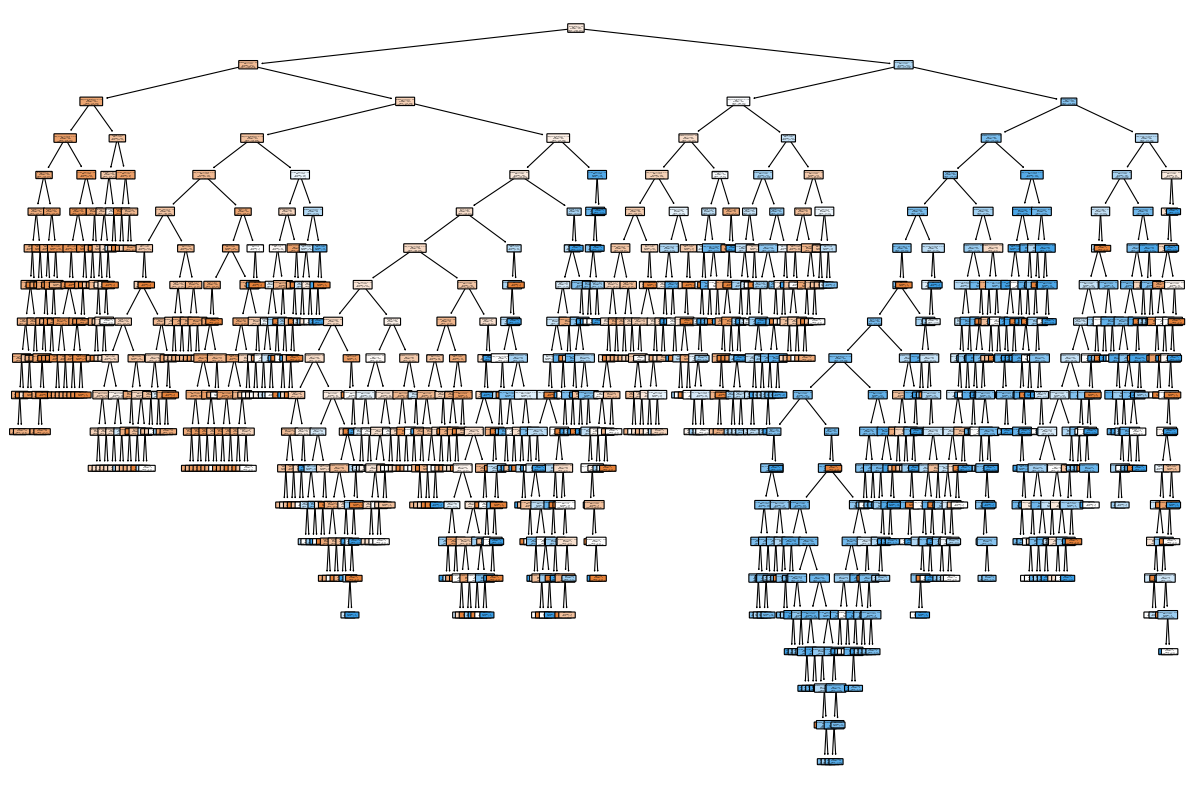

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=x.columns, class_names=["No Recidivism", "Recidivism"], filled=True, rounded=True)
plt.show()

Ensamble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier


voting_classifier = VotingClassifier(estimators=[('svm', svm), ('dt', dtc)], voting='soft')

# Train the Voting Classifier
voting_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = voting_classifier.predict(x_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Ensemble Accuracy: {accuracy:f}')

In [ ]:
# %pip install fairlearn


# from fairlearn.metrics import MetricFrame
# from fairlearn.metrics import selection_rate, demographic_parity_ratio
# from fairlearn.postprocessing import ThresholdOptimizer

# # Create a DataFrame with predictions, true labels, and sensitive features
# df_results = pd.DataFrame({'svm_predictions': svm_pred, 'dt_predictions': dt_pred,
#                            'ensemble_predictions': y_pred, 'labels': y_test,
#                            'African_American': x_test['African_American']})

# # Define fairness indicators for the 'African_American' feature
# fairness_metrics_svm = MetricFrame(selection_rate, y_true=df_results['labels'], y_pred=df_results['svm_predictions'], sensitive_features=df_results['African_American'])
# fairness_metrics_dt = MetricFrame(selection_rate, y_true=df_results['labels'], y_pred=df_results['dt_predictions'], sensitive_features=df_results['African_American'])
# fairness_metrics_ensemble = MetricFrame(selection_rate, y_true=df_results['labels'], y_pred=df_results['ensemble_predictions'], sensitive_features=df_results['African_American'])

# # Print fairness metrics for SVM
# print("Fairness Metrics for SVM:")
# print(fairness_metrics_svm.overall)
# print(fairness_metrics_svm.by_group)

# # Print fairness metrics for Decision Tree
# print("\nFairness Metrics for Decision Tree:")
# print(fairness_metrics_dt.overall)
# print(fairness_metrics_dt.by_group)

# # Print fairness metrics for Ensemble Learning
# print("\nFairness Metrics for Ensemble Learning:")
# print(fairness_metrics_ensemble.overall)
# print(fairness_metrics_ensemble.by_group)

Droping the coloums African_American,Asian,Hispanic,Native_American	and Other

In [ ]:
new_x=data.drop(["African_American","Asian","Hispanic","Native_American","Other","Two_yr_Recidivism"],axis=1)
new_y=data["Two_yr_Recidivism"]

In [ ]:

new_x

In [ ]:
new_x_train,new_x_test,new_y_train,new_y_test= train_test_split(new_x, new_y, test_size=0.2, shuffle=True, stratify=new_y, random_state=42)

In [ ]:

from sklearn.svm import SVC

# Set up SVM model with a given kernel and c parameter
svm = SVC(C=1.0, kernel='linear',probability=True)

# Train the model on the iris data
svm.fit(new_x_train, new_y_train)
score = svm.score(new_x_test, new_y_test)
print ("The score for this model is ", score)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(new_x_train, new_y_train)
score = dtc.score(new_x_test, new_y_test)
print ("The score for this model is ", score)

In [ ]:
from IPython.display import display

# Assuming you have a list of model names and their corresponding accuracy scores
data = {'Model': ['SVM', 'Decision Tree','Ensemble learning'],
        'Accuracy': [0.678,0.665, 0.680]}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
display(df)